In [1]:
import sys
import os

# Add the grand-parent directory to the Python path
parent_dir = os.path.abspath('../..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import modules
import ddsp_textures.signal_processors.synthesizers
import ddsp_textures.auxiliar.seeds

# Import extra packages
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import torch

# Resysnthesis function
def resynthesize_and_display(segments, sr, seed, N_filter_bank, frame_size, param_per_env, label, N):
    for _ in range(N):
        segment = segments[np.random.randint(len(segments))]
        segment = torch.tensor(segment, dtype=torch.float32)
        param_real, param_imag = ddsp_textures.signal_processors.synthesizers.SubEnv_param_extractor(segment, sr, N_filter_bank, param_per_env)
        new_audio = ddsp_textures.signal_processors.synthesizers.SubEnv(param_real, param_imag, seed)
        print(f"{label} original audio")
        display(Audio(data=segment.numpy(), rate=sr))
        print(f"{label} resynthesized audio")
        display(Audio(data=new_audio.numpy(), rate=sr))

In [2]:
# FIRE RESYNTHESIS --------------------------------------

# Load audio to resynthesize ----------------------------
fire_path = "../sounds/fire.wav"
sr = 44100
fire_audio, _ = librosa.load(fire_path, sr=sr)

# Make list of segments for fire and water --------------
frame_size = 2**16 # 2**16 = 65536 correspond to around 1.5 seconds (quite long frames)
hop_size = 2**16
fire_segments = []

for i in range(0, len(fire_audio) - frame_size, hop_size):
    fire_segments.append(fire_audio[i:i + frame_size])

# Seed creation -----------------------------------------
N_filter_bank = 24 # This is a high number of filter (16 is the typical)
seed = ddsp_textures.auxiliar.seeds.seed_maker(frame_size, 44100, N_filter_bank)

# Run the resynthesizer for a bunch of fire and water segments
param_per_env = 1024  # 1024*24 = 2**13 * 3 => compression of (2**13 * 3)/2**16 = 3/8 ~ 0.375 
resynthesize_and_display(fire_segments,  sr, seed, N_filter_bank, frame_size, param_per_env, "Fire",  3)

Fire original audio


Fire resynthesized audio


Fire original audio


Fire resynthesized audio


Fire original audio


Fire resynthesized audio


In [3]:
# WATER RESYNTHESIS --------------------------------------

# Load audio to resynthesize ----------------------------
water_path = "../sounds/water.wav"
sr = 44100
water_audio, _ = librosa.load(water_path, sr=sr)

# Water segments ----------------------------------------
frame_size = 2**14 # 2**14 corresponds to around 0.37 seconds (sort of short frames)
hop_size = 2**14
water_segments = []

for i in range(0, len(water_audio) - frame_size, hop_size):
    water_segments.append(water_audio[i:i + frame_size])

# Seed creation -----------------------------------------
N_filter_bank = 16
seed = ddsp_textures.auxiliar.seeds.seed_maker(frame_size, 44100, N_filter_bank)

# Run the resynthesizer for a bunch of fire and water segments
param_per_env = 256  # 256*16 = 2**12 => compression of 2**12/2**14 = 1/4
resynthesize_and_display(water_segments,  sr, seed, N_filter_bank, frame_size, param_per_env, "Water",  3)

Water original audio


Water resynthesized audio


Water original audio


Water resynthesized audio


Water original audio


Water resynthesized audio


In [4]:
# New resynthesis function using the stems functions
def resynthesize_and_display_stems(segments, sr, seed, N_filter_bank, frame_size, param_per_env, label, N):
    for _ in range(N):
        # Select a random audio segment from the provided list
        segment = segments[np.random.randint(len(segments))]
        segment = torch.tensor(segment, dtype=torch.float32)

        # Extract parameters (real and imaginary parts) for the envelope synthesis
        param_real, param_imag = ddsp_textures.signal_processors.synthesizers.SubEnv_param_extractor(
            segment, sr, N_filter_bank, param_per_env)

        # Get the list of env_locals using the modified SubEnv function (stems)
        env_locals = ddsp_textures.signal_processors.synthesizers.SubEnv_stems(param_real, param_imag, frame_size, N_filter_bank)

        # Convert the env_locals back into a signal using env_locals_to_signal
        new_audio = ddsp_textures.signal_processors.synthesizers.SubEnv_stems_to_signal(env_locals, seed)

        # Display original and resynthesized audio
        print(f"{label} original audio")
        display(Audio(data=segment.numpy(), rate=sr))

        print(f"{label} resynthesized audio from stems")
        display(Audio(data=new_audio.numpy(), rate=sr))

In [5]:
# WATER RESYNTHESIS --------------------------------------

# Load audio to resynthesize ----------------------------
water_path = "../sounds/water.wav"
sr = 44100
water_audio, _ = librosa.load(water_path, sr=sr)

# Water segments ----------------------------------------
frame_size = 2**14 # 2**14 corresponds to around 0.37 seconds (sort of short frames)
hop_size = 2**14
water_segments = []

for i in range(0, len(water_audio) - frame_size, hop_size):
    water_segments.append(water_audio[i:i + frame_size])

# Seed creation -----------------------------------------
N_filter_bank = 16
seed = ddsp_textures.auxiliar.seeds.seed_maker(frame_size, 44100, N_filter_bank)

# Run the resynthesizer for a bunch of fire and water segments
param_per_env = 256  # 256*16 = 2**12 => compression of 2**12/2**14 = 1/4
resynthesize_and_display_stems(water_segments,  sr, seed, N_filter_bank, frame_size, param_per_env, "Water",  3)

Water original audio


Water resynthesized audio from stems


Water original audio


Water resynthesized audio from stems


Water original audio


Water resynthesized audio from stems


param_real shape: torch.Size([2048])
param_imag shape: torch.Size([2048])
env_locals length: 16
env_locals[0] shape: torch.Size([16384])


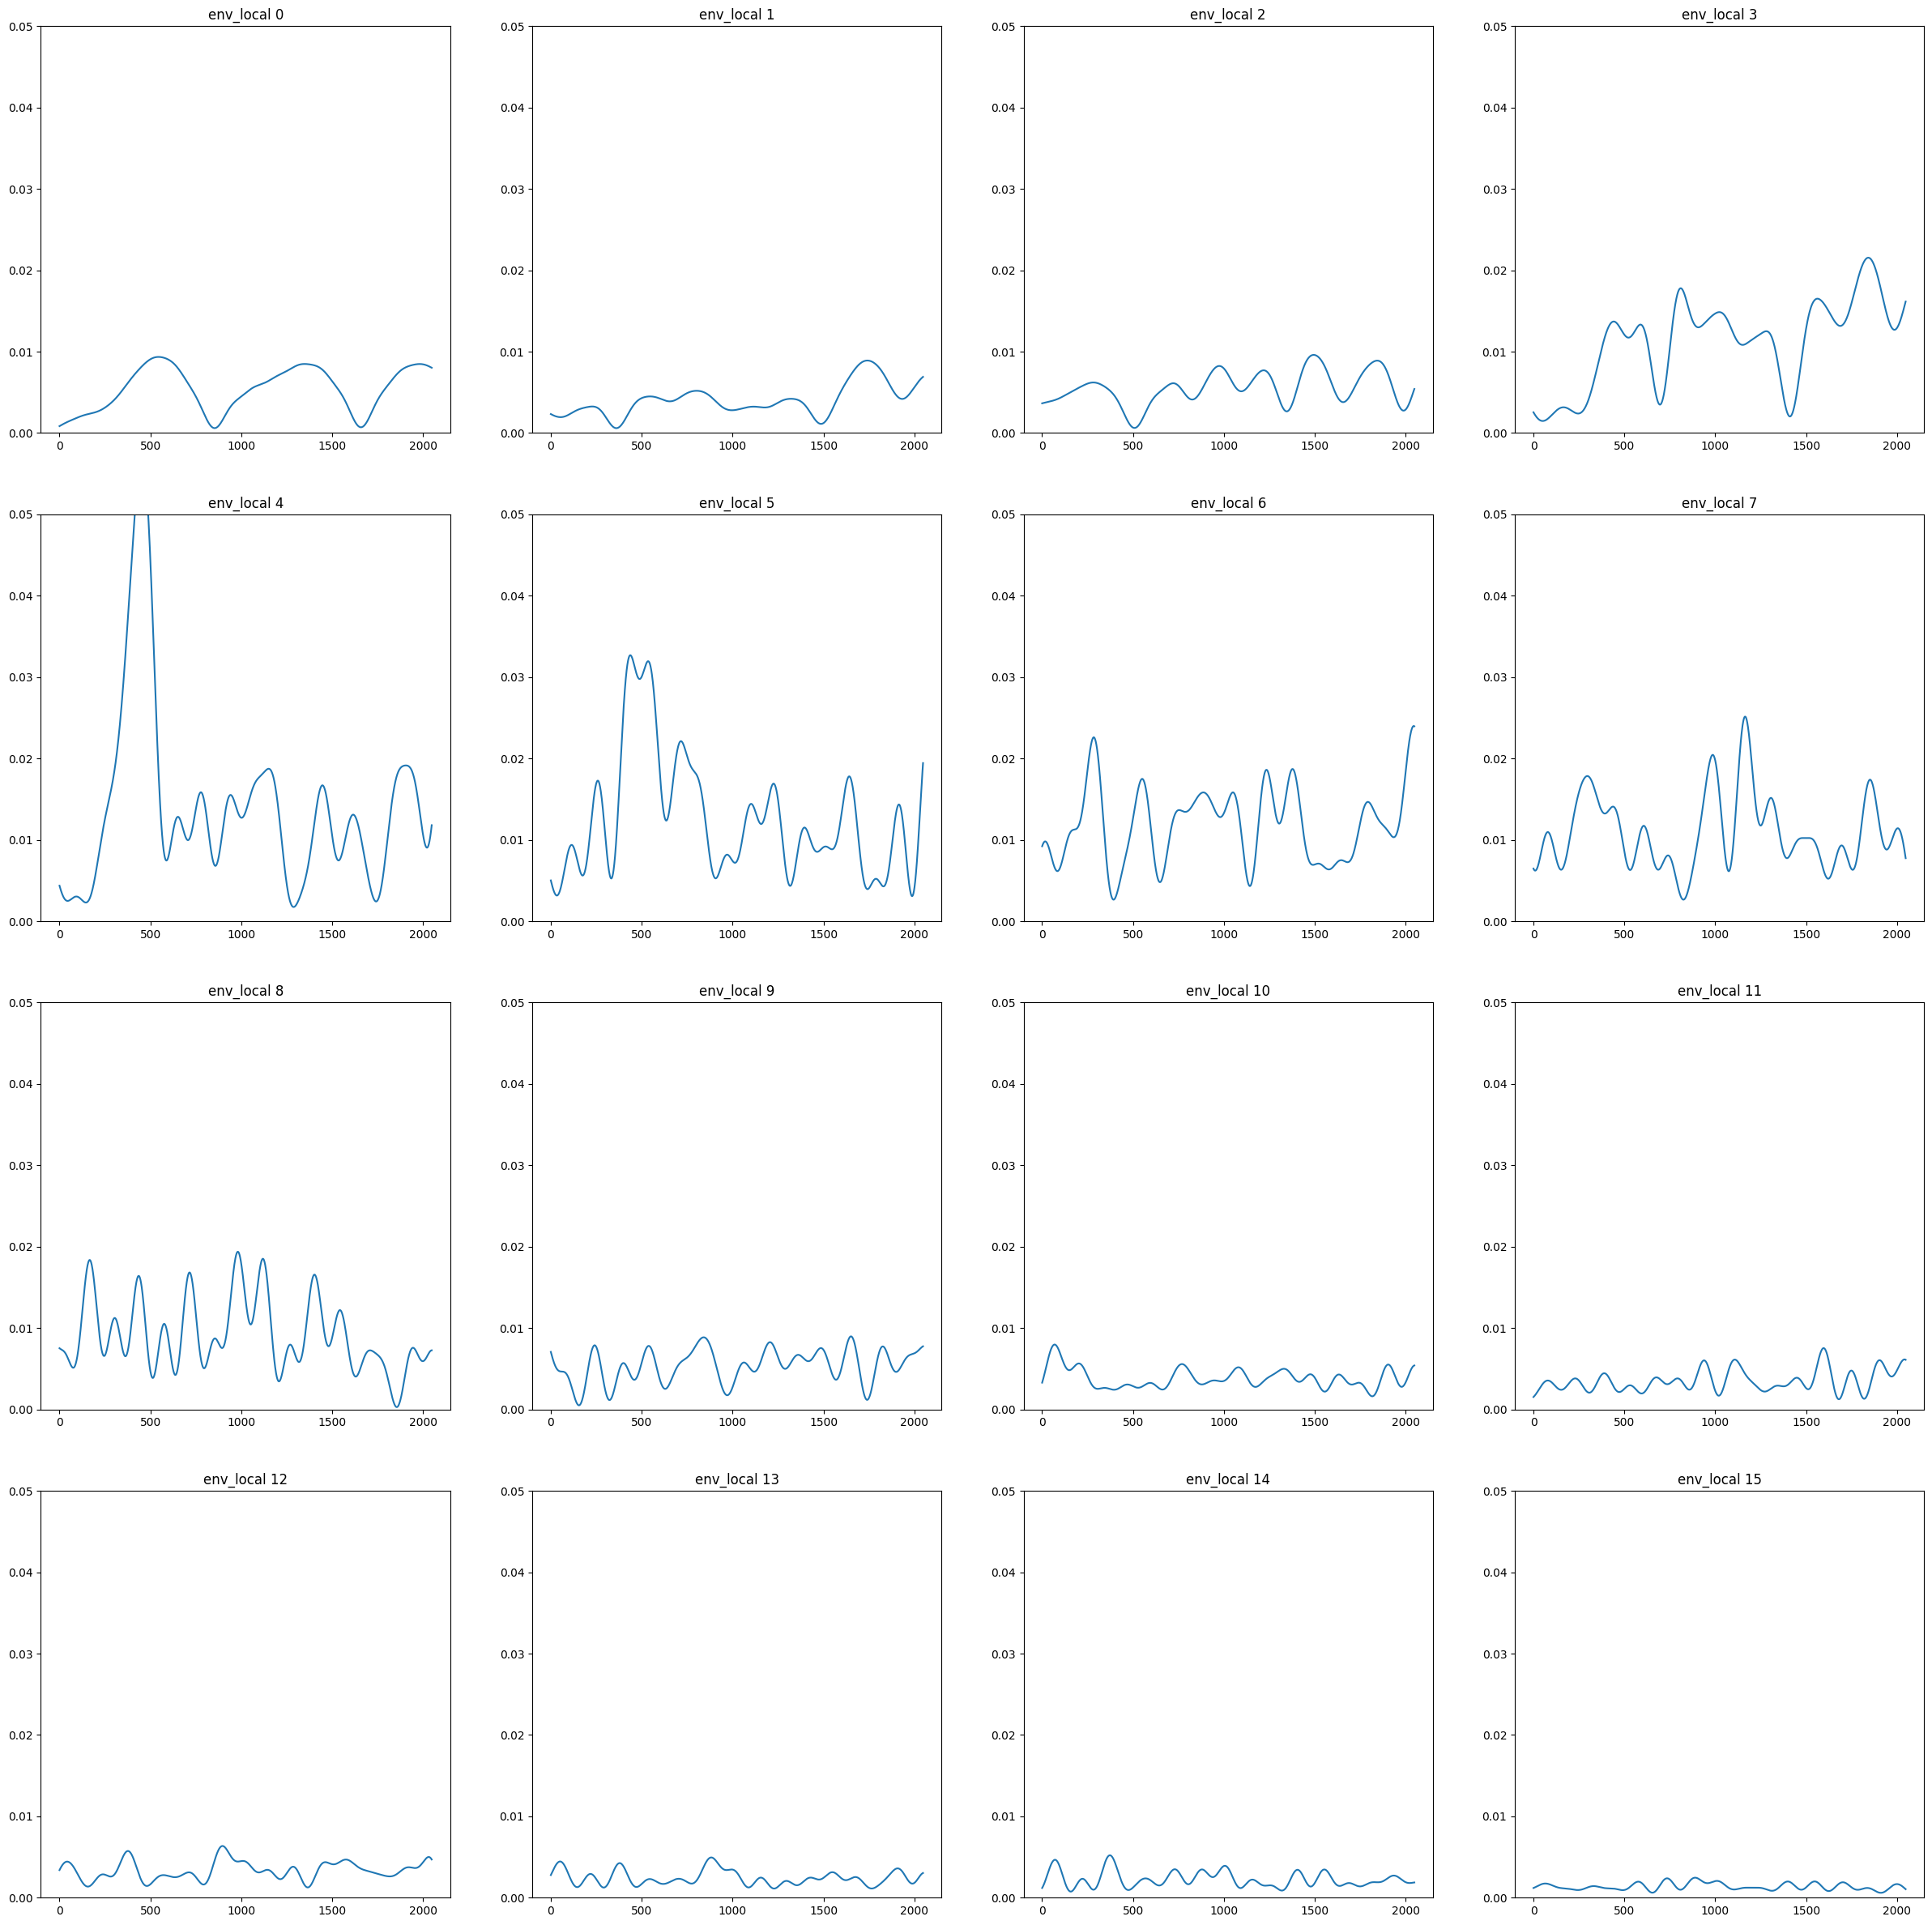

In [6]:
# Dimensions check for stems functions -------------------

# Load audio to resynthesize ----------------------------
water_path = "../sounds/water.wav"
sr = 44100
water_audio, _ = librosa.load(water_path, sr=sr)

# Water segments ----------------------------------------
frame_size = 2**14 # 2**14 corresponds to around 0.37 seconds (sort of short frames)
hop_size = 2**14
water_segment = water_audio[10*frame_size:11*frame_size]
water_segment_torch = torch.tensor(water_segment, dtype=torch.float32)
# Seed creation -----------------------------------------
N_filter_bank = 16
seed = ddsp_textures.auxiliar.seeds.seed_maker(frame_size, 44100, N_filter_bank)

# Run the resynthesizer for a bunch of fire and water segments
param_per_env = 256  # 256*16 = 2**12 => compression of 2**12/2**14 = 1/4

# Extract parameters (real and imaginary parts) for the envelope synthesis
param_real, param_imag = ddsp_textures.signal_processors.synthesizers.SubEnv_param_extractor(water_segment_torch, sr, N_filter_bank, param_per_env)

# print shapes
print("param_real shape:", param_real.shape)
print("param_imag shape:", param_imag.shape)

env_locals = ddsp_textures.signal_processors.synthesizers.SubEnv_stems(param_real, param_imag, frame_size, N_filter_bank)

print("env_locals length:", len(env_locals))
print("env_locals[0] shape:", env_locals[0].shape)

# plot all env_locals in one figure of 4x6 subplots with the same y-axis
plt.figure(figsize=(30, 30))
for i in range(len(env_locals)):
    plt.subplot(4, 4, i+1)
    plt.ylim(0, 0.05)
    plt.plot(env_locals[i][0:2048])
    plt.title(f"env_local {i}")
plt.show()

In [9]:
# Dimensions check for stems functions -------------------

# Load audio to resynthesize ----------------------------
water_path = "../sounds/water.wav"
sr = 44100
water_audio, _ = librosa.load(water_path, sr=sr)

# Water segments ----------------------------------------
frame_size = 2**14 # 2**14 corresponds to around 0.37 seconds (sort of short frames)
hop_size = 2**14
water_segments = []

# make batch of L segments
L = 16
for i in range(0, L):
    segment_local = water_audio[i:i + frame_size]
    segment_local_torch = torch.tensor(segment_local, dtype=torch.float32)
    water_segments.append(segment_local_torch)

#water segments to batch
water_segment_torch = torch.stack(water_segments)
print("(batch) water_segment_torch shape:", water_segment_torch.shape)

# Seed creation -----------------------------------------
N_filter_bank = 24
seed = ddsp_textures.auxiliar.seeds.seed_maker(frame_size, 44100, N_filter_bank)

# Run the resynthesizer for a bunch of fire and water segments
param_per_env = 256  # 256*16 = 2**12 => compression of 2**12/2**14 = 1/4

# Extract parameters (real and imaginary parts) for each segment in the batch and make a new batch of parameters
param_real = []
param_imag = []
for i in range(0, L):
    segment_local = water_segment_torch[i]
    param_real_local, param_imag_local = ddsp_textures.signal_processors.synthesizers.SubEnv_param_extractor(segment_local, sr, N_filter_bank, param_per_env)
    param_real.append(param_real_local)
    param_imag.append(param_imag_local)

#Make batches of parameters
param_real = torch.stack(param_real)
param_imag = torch.stack(param_imag)

# print shapes
print("(batch) param_real shape:", param_real.shape)
print("(batch) param_imag shape:", param_imag.shape)

env_locals_batches = ddsp_textures.signal_processors.synthesizers.SubEnv_stems_batches(param_real, param_imag, frame_size, N_filter_bank)

#print shape
print("env_locals_batches shape:", env_locals_batches.shape)

(batch) water_segment_torch shape: torch.Size([16, 16384])
(batch) param_real shape: torch.Size([16, 3072])
(batch) param_imag shape: torch.Size([16, 3072])
env_locals_batches shape: torch.Size([16, 24, 16384])
